Applying SVM, Naive Bayes, Decision tree and KNN to predict diabetes based on features set. Compare the four classification algorithms with performance metrics such as accuracy, recall, precision, F1- score. Also, design the heat map confusion matrix for the above algorithms and construct ROC curve for comparison.

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
d = pd.read_csv('pima-indians-diabetes.data.csv', names=['P','G','B','S','I','BMI','DPF','A','O'])
X, y = d.iloc[:,:-1], d.iloc[:,-1]

In [4]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
Xtr_scaled = scaler.fit_transform(Xtr)
Xte_scaled = scaler.transform(Xte)

In [6]:
models = {
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

--- SVM ---
Accuracy: 0.7597
Precision: 0.6667
Recall: 0.6545
F1-Score: 0.6606


<Figure size 800x600 with 0 Axes>

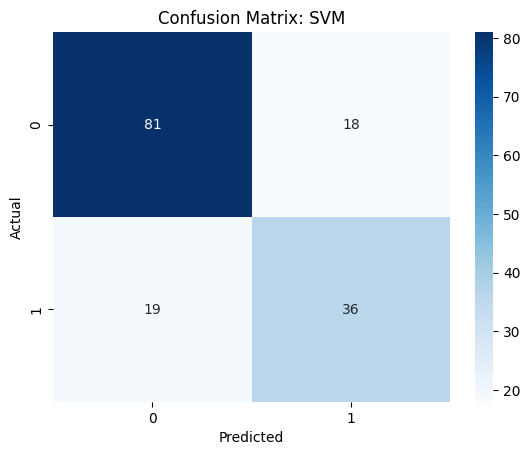

--- Naive Bayes ---
Accuracy: 0.7662
Precision: 0.6610
Recall: 0.7091
F1-Score: 0.6842


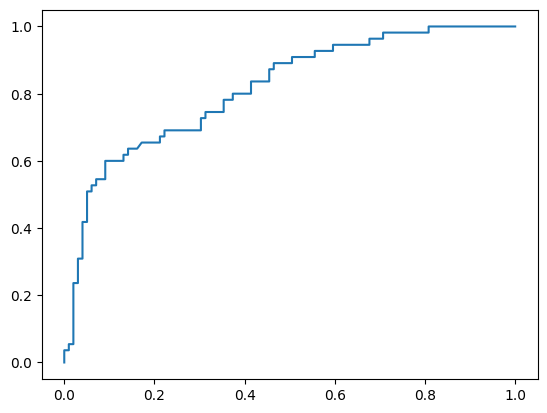

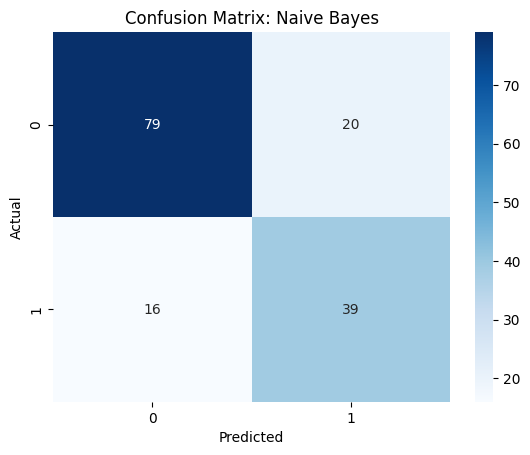

--- Decision Tree ---
Accuracy: 0.7468
Precision: 0.6250
Recall: 0.7273
F1-Score: 0.6723


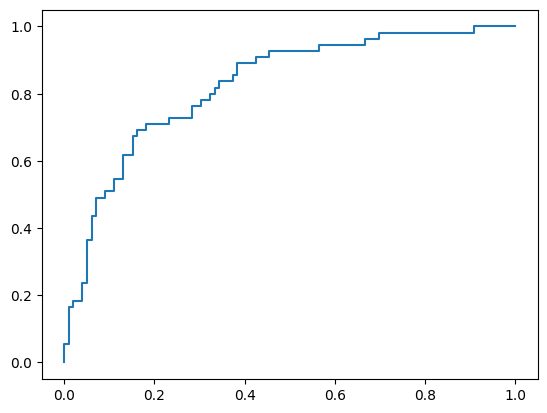

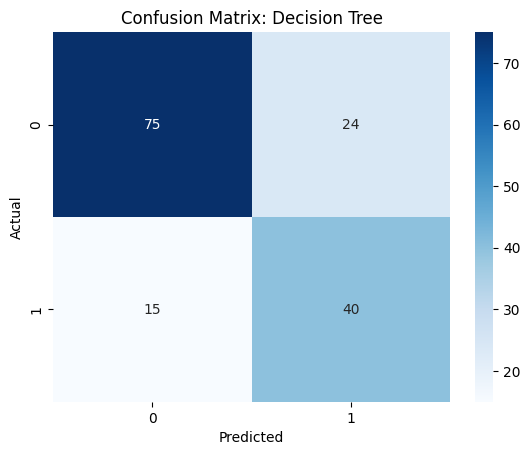

--- KNN ---
Accuracy: 0.6948
Precision: 0.5833
Recall: 0.5091
F1-Score: 0.5437


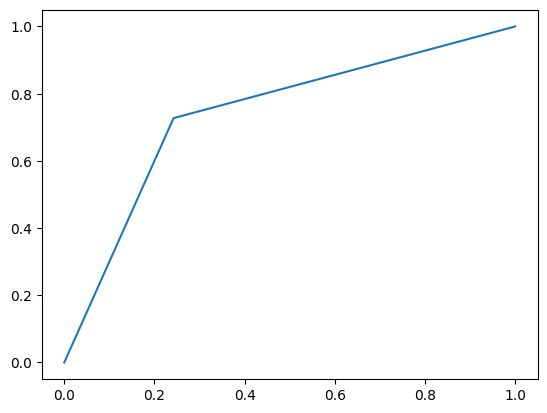

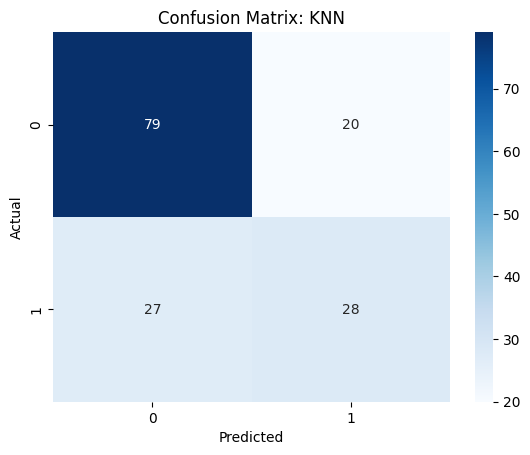

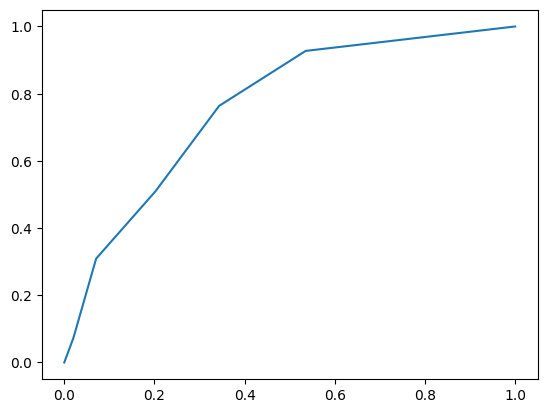

In [7]:
# Create one figure for all ROC curves
plt.figure(figsize=(8, 6))

for n, m in models.items():
    # 1. Train the model
    m.fit(Xtr_scaled, ytr)

    # 2. Make predictions
    p = m.predict(Xte_scaled)

    # 3. Print performance metrics
    print(f"--- {n} ---")
    print(f"Accuracy: {accuracy_score(yte, p):.4f}")
    print(f"Precision: {precision_score(yte, p):.4f}")
    print(f"Recall: {recall_score(yte, p):.4f}")
    print(f"F1-Score: {f1_score(yte, p):.4f}")

    # 4. Plot Confusion Matrix Heatmap
    plt.figure() # Create a new figure for the heatmap
    sns.heatmap(confusion_matrix(yte, p), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {n}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show() # Show the heatmap

    # 5. Get data for ROC curve (plot on the main figure)
    y_prob = m.predict_proba(Xte_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(yte, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{n} (AUC = {roc_auc:.2f})')

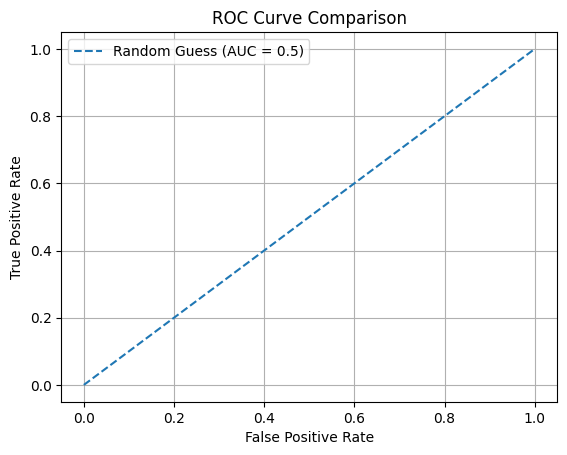

In [8]:
# Add finishing touches to the ROC plot
plt.plot([0, 1], [0, 1], '--', label='Random Guess (AUC = 0.5)')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()